In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID
from utils import delphesRootToPixelAvTrackList as utils

In [2]:
datadir = '/home/elizahoward/cmspix28-mc-sim/TestDataUnflippedVertexCut/'
flp = 0

In [3]:
truthLow = pd.read_parquet(datadir+"labelsminbias_0.00_0.10_GeV.parquet")
recon2DLow = pd.read_parquet(datadir+"recon2Dminbias_0.00_0.10_GeV.parquet")

Q = []
for pid in truthLow['PID']:
    Q.append(PDGID(pid).charge)
truthLow['q'] = Q

# Seperate into positive and negative particles
cut = truthLow['q']>0
truthLowPos = truthLow[cut]
recon2DLowPos = recon2DLow[cut]
clustersLowPos = recon2DLowPos.to_numpy().reshape(recon2DLowPos.shape[0],13,21)

cut = truthLow['q']<0
truthLowNeg = truthLow[cut]
recon2DLowNeg = recon2DLow[cut]
clustersLowNeg = recon2DLowNeg.to_numpy().reshape(recon2DLowNeg.shape[0],13,21)

truthHigh = pd.read_parquet(datadir+"labelsminbias_1.90_2.00_GeV.parquet")
recon2DHigh = pd.read_parquet(datadir+"recon2Dminbias_1.90_2.00_GeV.parquet")
clustersHigh = recon2DHigh.to_numpy().reshape(recon2DHigh.shape[0],13,21)

Q = []
for pid in truthHigh['PID']:
    Q.append(PDGID(pid).charge)
truthHigh['q'] = Q

# Seperate into positive and negative particles
cut = truthHigh['q']>0
truthHighPos = truthHigh[cut]
recon2DHighPos = recon2DHigh[cut]
clustersHighPos = recon2DHighPos.to_numpy().reshape(recon2DHighPos.shape[0],13,21)

cut = truthHigh['q']<0
truthHighNeg = truthHigh[cut]
recon2DHighNeg = recon2DHigh[cut]
clustersLoHighNeg = recon2DHighNeg.to_numpy().reshape(recon2DHighNeg.shape[0],13,21)


In [4]:
def getProfiles(clusters):
    profiles = np.sum(clusters, axis = 2)
    totalCharge = np.sum(profiles, axis = 1, keepdims=True)
    return profiles/totalCharge

def getAverageProfile(clusters):
    profiles=getProfiles(clusters)
    return np.mean(profiles, axis=0)

In [5]:
def getClusterSizes(clusters):
    profiles=getProfiles(clusters)
    bool_arr = profiles != 0
    return np.sum(bool_arr, axis = 1)

def getAverageClusterSize(clusters):
    clusterSizes = getClusterSizes(clusters)
    return np.mean(clusterSizes)

In [6]:
# Seperate into out by ylocal
cut = truthLowPos['y-local']<-6

truthLowPos1 = truthLowPos[cut]
recon2DLowPos1 = recon2DLowPos[cut]
clustersLowPos1 = recon2DLowPos1.to_numpy().reshape(recon2DLowPos1.shape[0],13,21)

cut = truthLowNeg['y-local']<-6
truthLowNeg1 = truthLowNeg[cut]
recon2DLowNeg1 = recon2DLowNeg[cut]
clustersLowNeg1 = recon2DLowNeg1.to_numpy().reshape(recon2DLowNeg1.shape[0],13,21)

cut = truthHigh['y-local']<-6
truthHigh1 = truthHigh[cut]
recon2DHigh1 = recon2DHigh[cut]
clustersHigh1 = recon2DHigh1.to_numpy().reshape(recon2DHigh1.shape[0],13,21)

profileLowPos1 = getAverageProfile(clustersLowPos1)
profileLowNeg1 = getAverageProfile(clustersLowNeg1)
profileHigh1 = getAverageProfile(clustersHigh1)

In [7]:
# Seperate into out by ylocal
cut = truthLowPos['y-local']>6

truthLowPos2 = truthLowPos[cut]
recon2DLowPos2 = recon2DLowPos[cut]
clustersLowPos2 = recon2DLowPos2.to_numpy().reshape(recon2DLowPos2.shape[0],13,21)

cut = truthLowNeg['y-local']>6
truthLowNeg2 = truthLowNeg[cut]
recon2DLowNeg2 = recon2DLowNeg[cut]
clustersLowNeg2 = recon2DLowNeg2.to_numpy().reshape(recon2DLowNeg2.shape[0],13,21)

cut = truthHigh['y-local']>6
truthHigh2 = truthHigh[cut]
recon2DHigh2 = recon2DHigh[cut]
clustersHigh2 = recon2DHigh2.to_numpy().reshape(recon2DHigh2.shape[0],13,21)

profileLowPos2 = getAverageProfile(clustersLowPos2)
profileLowNeg2 = getAverageProfile(clustersLowNeg2)
profileHigh2 = getAverageProfile(clustersHigh2)

In [8]:
# Seperate into out by ylocal
cut1 = truthLowPos['y-local']>-1
cut2= truthLowPos['y-local']<1
# Combine conditions using bitwise AND
cut = cut1 & cut2

truthLowPos3 = truthLowPos[cut]
recon2DLowPos3 = recon2DLowPos[cut]
clustersLowPos3 = recon2DLowPos3.to_numpy().reshape(recon2DLowPos3.shape[0],13,21)

cut1 = truthLowNeg['y-local']>-1
cut2= truthLowNeg['y-local']<1
# Combine conditions using bitwise AND
cut = cut1 & cut2
truthLowNeg3 = truthLowNeg[cut]
recon2DLowNeg3 = recon2DLowNeg[cut]
clustersLowNeg3 = recon2DLowNeg3.to_numpy().reshape(recon2DLowNeg3.shape[0],13,21)

cut1 = truthHigh['y-local']>-1
cut2= truthHigh['y-local']<1
# Combine conditions using bitwise AND
cut = cut1 & cut2
truthHigh3 = truthHigh[cut]
recon2DHigh3 = recon2DHigh[cut]
clustersHigh3 = recon2DHigh3.to_numpy().reshape(recon2DHigh3.shape[0],13,21)

profileLowPos3 = getAverageProfile(clustersLowPos3)
profileLowNeg3 = getAverageProfile(clustersLowNeg3)
profileHigh3 = getAverageProfile(clustersHigh3)

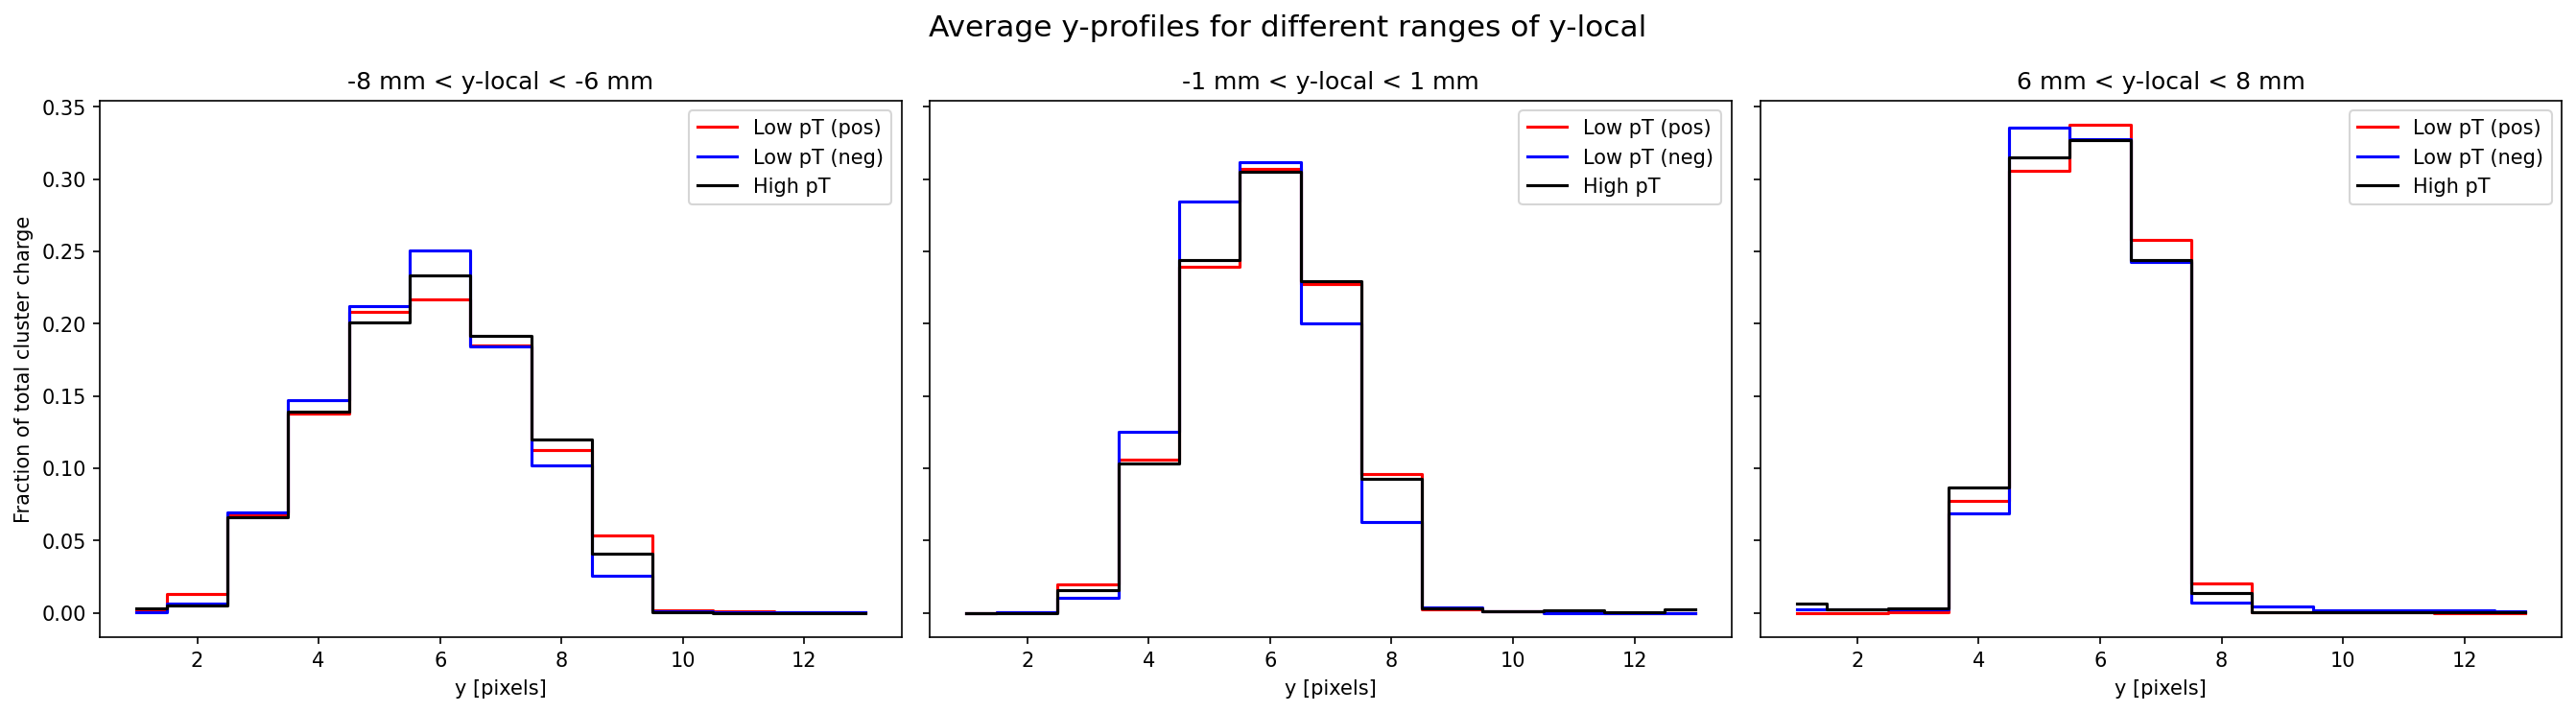

In [9]:
yaxis=np.arange(1,14,1)
fig, ax = plt.subplots(1,3, sharey=True, figsize=(18,5))
ax[0].step(yaxis,profileLowPos1, where="mid", label="Low pT (pos)", c ='r')
ax[0].step(yaxis,profileLowNeg1, where="mid", label="Low pT (neg)", c='b')
ax[0].step(yaxis,profileHigh1, where="mid", label="High pT", c='k')
ax[0].legend()
ax[0].set_title("-8 mm < y-local < -6 mm")
ax[0].set_ylabel("Fraction of total cluster charge")
ax[0].set_xlabel("y [pixels]")

ax[1].step(yaxis,profileLowPos3, where="mid", label="Low pT (pos)", c ='r')
ax[1].step(yaxis,profileLowNeg3, where="mid", label="Low pT (neg)", c='b')
ax[1].step(yaxis,profileHigh3, where="mid", label="High pT", c='k')
ax[1].legend()
ax[1].set_title("-1 mm < y-local < 1 mm")
ax[1].set_xlabel("y [pixels]")

ax[2].step(yaxis,profileLowPos2, where="mid", label="Low pT (pos)", c ='r')
ax[2].step(yaxis,profileLowNeg2, where="mid", label="Low pT (neg)", c='b')
ax[2].step(yaxis,profileHigh2, where="mid", label="High pT", c='k')
ax[2].legend()
ax[2].set_title("6 mm < y-local < 8 mm")
ax[2].set_xlabel("y [pixels]")

fig.suptitle('Average y-profiles for different ranges of y-local', fontsize=15)
plt.tight_layout()
plt.show()

In [10]:
def clusterSizeVsYlocal(truth, recon2D):
    clusterSize=[]
    intervals = np.arange(-8.5,9,1)
    for i in range(len(intervals)-1):
        cut1 = truth['y-local']>=intervals[i]
        cut2 = truth['y-local']<intervals[i+1]
        cut = cut1 & cut2
        tempRecon2D=recon2D[cut]
        clusters = tempRecon2D.to_numpy().reshape(tempRecon2D.shape[0],13,21)
        clusterSize.append(getAverageClusterSize(clusters))
    return clusterSize

ylocals=np.arange(-8,9,1)

In [11]:
lowPosSize=clusterSizeVsYlocal(truthLowPos, recon2DLowPos)
lowNegSize=clusterSizeVsYlocal(truthLowNeg, recon2DLowNeg)
highSize=clusterSizeVsYlocal(truthHigh, recon2DHigh)

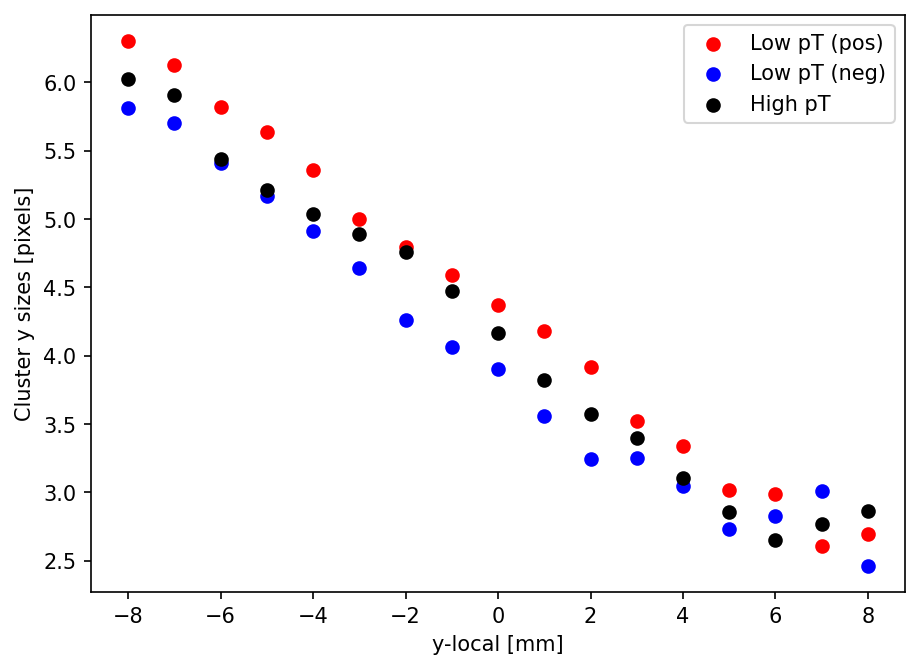

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(ylocals, lowPosSize, c='r', label="Low pT (pos)")
ax.scatter(ylocals, lowNegSize, c='b', label="Low pT (neg)")
ax.scatter(ylocals, highSize, c='k', label="High pT")
ax.set_xlabel("y-local [mm]")
ax.set_ylabel("Cluster y sizes [pixels]")
ax.legend()
plt.show()

In [13]:
# Low pt, pos
ptLow = 0.25 # Gev
ptHigh = 1.95 # GeV

q = 1

RLow = ptLow*5.36/(np.abs(q)*1.60217663*3.8)*1000
RHigh = ptHigh*5.36/(np.abs(q)*1.60217663*3.8)*1000
y0 = np.arange(-8, 8.5, .5)

betaLowPos = utils.getBeta(y0, RLow, q)+np.pi
betaLowNeg = utils.getBeta(y0, RLow, -q)+np.pi
betaHighPos = utils.getBeta(y0, RHigh, q)+np.pi
betaHighNeg = utils.getBeta(y0, RHigh, -q)+np.pi

if flp ==0:
    y0 *= -1

print(f"Max/Min Beta for high pt: {betaHighPos[len(betaHighPos)-1]} / {betaHighNeg[0]}")
print(f"Max/Min Beta for low pt: {betaLowPos[len(betaLowPos)-1]} / {betaLowNeg[0]}")

Max/Min Beta for high pt: 1.3011510079728623 / 1.8404416456169308
Max/Min Beta for low pt: 1.2396014492154144 / 1.9019912043743787


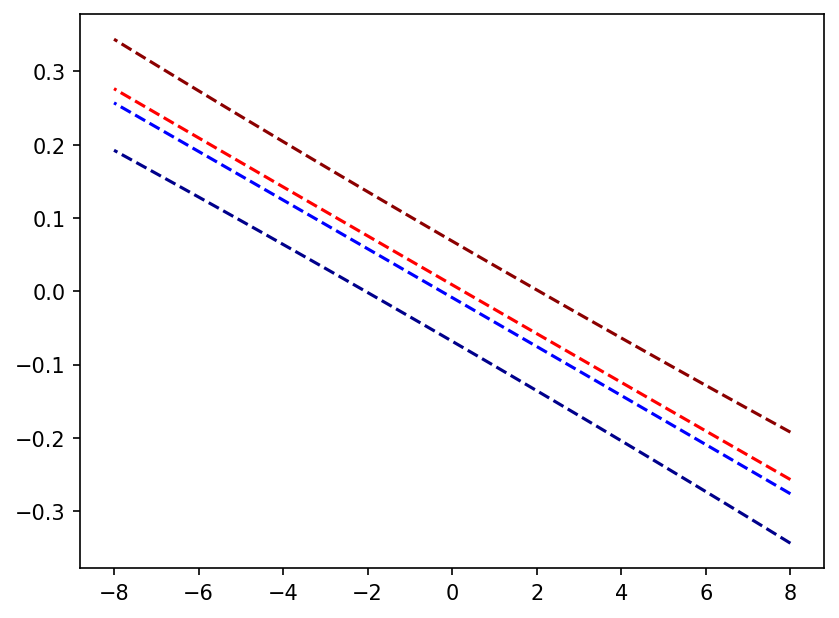

In [14]:
plt.plot(y0, 1/np.tan(betaLowPos), color='darkred',linestyle = 'dashed',label='predicted: low pt (pos)',alpha=1)
plt.plot(y0, 1/np.tan(betaLowNeg), color='darkblue',linestyle = 'dashed',label='predicted: low pt (neg)',alpha=1)
plt.plot(y0, 1/np.tan(betaHighPos), color='red',linestyle = 'dashed',label='predicted: high pt (pos)',alpha=1)
plt.plot(y0, 1/np.tan(betaHighNeg), color='blue',linestyle = 'dashed',label='predicted: high pt (neg)',alpha=1)
plt.show()

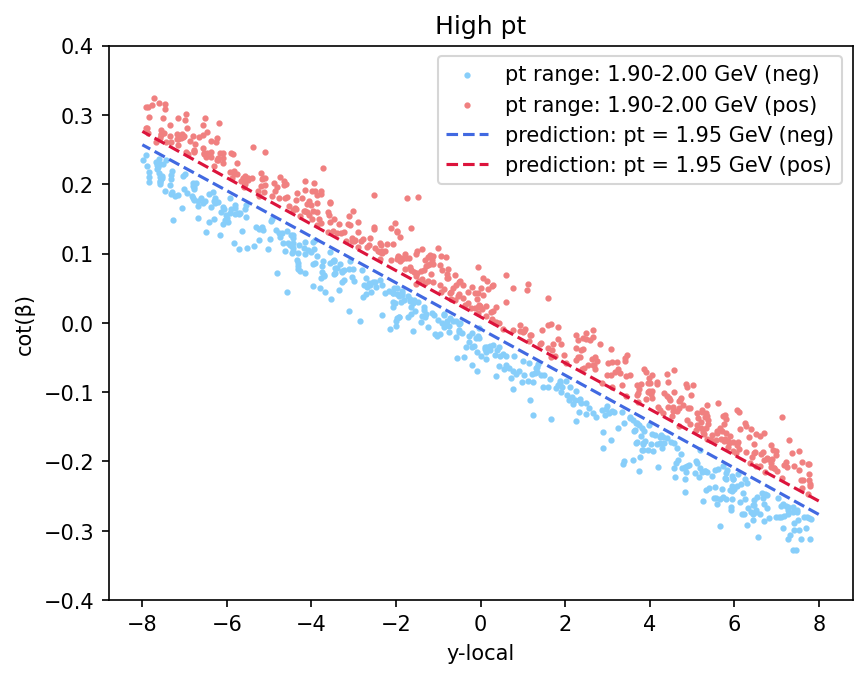

In [15]:
plt.scatter(truthHighNeg['y-local'], truthHighNeg['cotBeta'], color='lightskyblue', s=4, label='pt range: 1.90-2.00 GeV (neg)')
plt.scatter(truthHighPos['y-local'], truthHighPos['cotBeta'], color='lightcoral', s=4, label='pt range: 1.90-2.00 GeV (pos)')
plt.plot(y0, 1/np.tan(betaHighNeg), color='royalblue',linestyle = 'dashed',label='prediction: pt = 1.95 GeV (neg)',alpha=1)
plt.plot(y0, 1/np.tan(betaHighPos), color='crimson',linestyle = 'dashed',label='prediction: pt = 1.95 GeV (pos)',alpha=1)
plt.ylim(-.4, .4)
plt.legend()
plt.ylabel(f'cot(\u03B2)')
plt.xlabel('y-local')
plt.title("High pt")
plt.show()

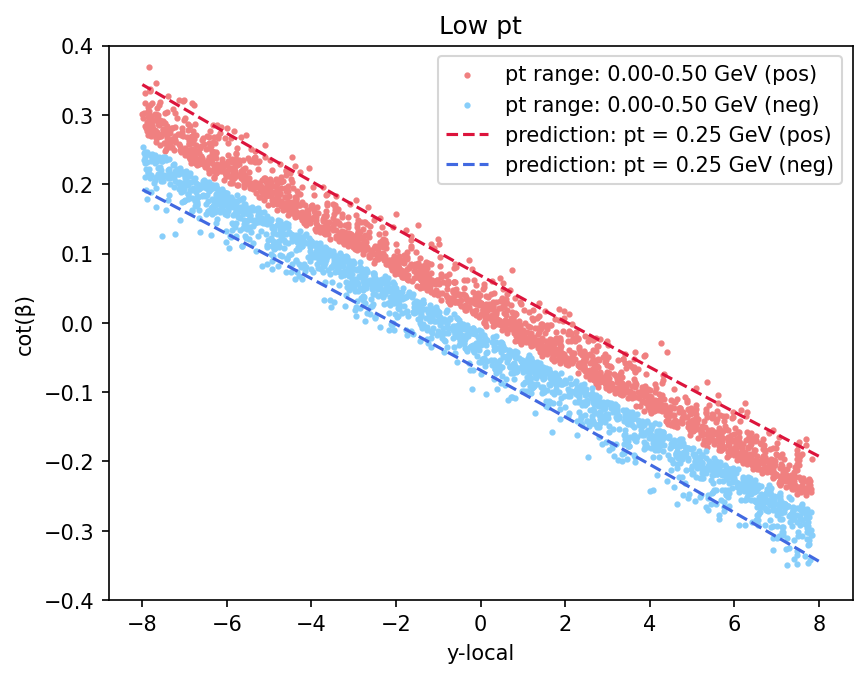

In [16]:
plt.scatter(truthLowPos['y-local'], truthLowPos['cotBeta'], color='lightcoral',s=4, label='pt range: 0.00-0.50 GeV (pos)')
plt.scatter(truthLowNeg['y-local'], truthLowNeg['cotBeta'], color='lightskyblue', s=4, label='pt range: 0.00-0.50 GeV (neg)')
#plt.scatter(truthHigh['y-local'], truthHigh['cotBeta'], color='k', s=4, label='high pt')
plt.plot(y0, 1/np.tan(betaLowPos), color='crimson',linestyle = 'dashed',label='prediction: pt = 0.25 GeV (pos)',alpha=1)
plt.plot(y0, 1/np.tan(betaLowNeg), color='royalblue',linestyle = 'dashed',label='prediction: pt = 0.25 GeV (neg)',alpha=1)
#plt.plot(y0, 1/np.tan(betaHighPos), color='k',linestyle = 'dashed',label='predicted: high pt',alpha=1)
plt.ylim(-.4, .4)
plt.legend()
plt.ylabel(f'cot(\u03B2)')
plt.xlabel('y-local')
plt.title("Low pt")
plt.show()

In [17]:
len(truthHigh)

1007

In [37]:
len(truthLow)

3878